<a href="https://colab.research.google.com/github/raazshrestha9876/data-analysis-and-visualization/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#pandas
import pandas as pd
import numpy as np

In [6]:
#1. Series => A Series is a one-dimensional labeled array capable of holding any data type.

#create series from list with default index
s1 = pd.Series([10, 20, 30, 40])
print("S1: \n", s1)

#create series with custom index
s2 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'], name='temperatures')
print("\nS2: \n", s2)


S1: 
 0    10
1    20
2    30
3    40
dtype: int64

S2: 
 a    10
b    20
c    30
d    40
Name: temperatures, dtype: int64


In [9]:
#example 2: series from Dictionary

population_dict = { 'New york': 8.4, 'London': 9.0, 'Tokyo': 13.9 }
pop_series = pd.Series(population_dict)
print("Population Series: \n", pop_series)

#add new city
new_data = { 'London': 9.1, 'Paris': 2.2 }
pop_series = pop_series.add(pd.Series(new_data), fill_value=0)
print("\nUpdated Population:\n", pop_series)

Population Series: 
 New york     8.4
London       9.0
Tokyo       13.9
dtype: float64

Updated Population:
 London      18.1
New york     8.4
Paris        2.2
Tokyo       13.9
dtype: float64


In [139]:
#example 3: Vectorized Operations & filtering

#vectorized operations
squares = pd.Series([1, 4, 9, 16, 25])
sqrt = np.sqrt(squares)
print("Square Roots:\n", sqrt)

#boolean filtering
filtered = sqrt[sqrt > 2]
print("\nFiltered Values:\n", filtered)

#index-based operations
reindexed = filtered.reindex([0,1, 2, 3, 4], fill_value=0)
print("\nReindexed Values:\n", reindexed)


Square Roots:
 0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

Filtered Values:
 2    3.0
3    4.0
4    5.0
dtype: float64

Reindexed Values:
 0    0.0
1    0.0
2    3.0
3    4.0
4    5.0
dtype: float64


In [14]:
#2. Data Frame => A DataFrame is a two-dimensional labeled data structure with columns of potentially different types.

In [16]:
#Example 1: DataFrame creation

data = {
    'City': ['New York', 'London', 'Tokyo', 'Delhi'],
    'Population': [8.4, 9.0, 13.9, 13.3],
    'Country': ['USA', 'UK', 'Japan', 'India']
}

df = pd.DataFrame(data, index=['A', 'B', 'C', 'D'])
print("DataFrame: \n", df)

#Add new column
df['GDP (B)'] = [ 1000, 2000, 3000, 4000 ]
print("\nUpdated DataFrame: \n", df)

#Remove existing column
df.drop('Country', axis=1, inplace=True)
print("\nDataFrame after dropping column: \n", df)

DataFrame: 
        City  Population Country
A  New York         8.4     USA
B    London         9.0      UK
C     Tokyo        13.9   Japan
D     Delhi        13.3   India

Updated DataFrame: 
        City  Population Country  GDP (B)
A  New York         8.4     USA     1000
B    London         9.0      UK     2000
C     Tokyo        13.9   Japan     3000
D     Delhi        13.3   India     4000

DataFrame after dropping column: 
        City  Population  GDP (B)
A  New York         8.4     1000
B    London         9.0     2000
C     Tokyo        13.9     3000
D     Delhi        13.3     4000


In [18]:
#example 2: Indexing and Selection

#column selection
print("Cities: \n", df['City'])

#Row selection by label
print("\n Row B: \n", df.loc['B'])

#Row selection by position
print('\nFirst row: \n', df.iloc[0])

#boolean indexing
print("\nLarge cities: \n", df[df['Population'] > 10])

#multi-axis selection
print("\nSpecific selection: \n", df.loc['C', ['City', 'GDP (B)']])



Cities: 
 A    New York
B      London
C       Tokyo
D       Delhi
Name: City, dtype: object

 Row B: 
 City          London
Population       9.0
GDP (B)         2000
Name: B, dtype: object

First row: 
 City          New York
Population         8.4
GDP (B)           1000
Name: A, dtype: object

Large cities: 
     City  Population  GDP (B)
C  Tokyo        13.9     3000
D  Delhi        13.3     4000

Specific selection: 
 City       Tokyo
GDP (B)     3000
Name: C, dtype: object


In [20]:
#Example 3: Handling Missing Data

#create df with missing values

df_missing = pd.DataFrame({
    'A': [1, None, 3],
    'B': [np.nan, 5, 6],
    'C': [7, 8, None]
})
print("Original:\n", df_missing)

#fill mising with column mean
df_filled = df_missing.fillna(df_missing.mean())
print("\nFilled:\n", df_filled)

#drop rows with missing values
df_dropped = df_missing.dropna()
print("\nDropped:\n", df_dropped)

Original:
      A    B    C
0  1.0  NaN  7.0
1  NaN  5.0  8.0
2  3.0  6.0  NaN

Filled:
      A    B    C
0  1.0  5.5  7.0
1  2.0  5.0  8.0
2  3.0  6.0  7.5

Dropped:
 Empty DataFrame
Columns: [A, B, C]
Index: []


In [51]:
#Data I/O and Data inspection

#reading data
students_df = pd.read_csv('students.csv')

#view data
students_df.head(10)


,StudentID,Name,Age,Gender,MathScore,EnglishScore,ScienceScore,Passed
0,1,Alice,17,Female,85.0,78.0,92.0,Yes
1,2,Bob,18,Male,58.0,64.0,70.0,Yes
2,3,Charlie,17,Male,45.0,56.0,49.0,No
3,4,Diana,18,Female,99.0,94.0,90.0,Yes
4,5,Edward,16,Male,66.0,70.0,65.0,Yes
5,6,Fiona,17,Female,NaN,88.0,75.0,Yes
6,7,George,18,Male,40.0,NaN,52.0,No
7,8,Hannah,17,Female,82.0,79.0,85.0,Yes
8,9,Ian,16,Male,55.0,60.0,58.0,No
9,10,Jane,17,Female,91.0,85.0,NaN,Yes


In [46]:
#check for missing values:
students_df.isnull().sum()

,0
StudentID,0
Name,0
Age,0
Gender,0
MathScore,1
EnglishScore,1
ScienceScore,1
Passed,0


In [54]:
#filling missing values //but this approach will incorrect
students_df.fillna(0, inplace=True)

students_df.head(10)

,StudentID,Name,Age,Gender,MathScore,EnglishScore,ScienceScore,Passed
0,1,Alice,17,Female,85.0,78.000000,92.000000,Yes
1,2,Bob,18,Male,58.0,64.000000,70.000000,Yes
2,3,Charlie,17,Male,45.0,56.000000,49.000000,No
3,4,Diana,18,Female,99.0,94.000000,90.000000,Yes
4,5,Edward,16,Male,66.0,70.000000,65.000000,Yes
5,6,Fiona,17,Female,69.0,88.000000,75.000000,Yes
6,7,George,18,Male,40.0,74.888889,52.000000,No
7,8,Hannah,17,Female,82.0,79.000000,85.000000,Yes
8,9,Ian,16,Male,55.0,60.000000,58.000000,No
9,10,Jane,17,Female,91.0,85.000000,70.666667,Yes


In [55]:
#filling missing values with mean of specific column
students_df['MathScore'] = students_df['MathScore'].fillna(students_df['MathScore'].mean())
students_df['EnglishScore'] = students_df['EnglishScore'].fillna(students_df['EnglishScore'].mean())
students_df['ScienceScore'] = students_df['ScienceScore'].fillna(students_df['ScienceScore'].mean())

students_df.head(10)

,StudentID,Name,Age,Gender,MathScore,EnglishScore,ScienceScore,Passed
0,1,Alice,17,Female,85.0,78.000000,92.000000,Yes
1,2,Bob,18,Male,58.0,64.000000,70.000000,Yes
2,3,Charlie,17,Male,45.0,56.000000,49.000000,No
3,4,Diana,18,Female,99.0,94.000000,90.000000,Yes
4,5,Edward,16,Male,66.0,70.000000,65.000000,Yes
5,6,Fiona,17,Female,69.0,88.000000,75.000000,Yes
6,7,George,18,Male,40.0,74.888889,52.000000,No
7,8,Hannah,17,Female,82.0,79.000000,85.000000,Yes
8,9,Ian,16,Male,55.0,60.000000,58.000000,No
9,10,Jane,17,Female,91.0,85.000000,70.666667,Yes


In [57]:
#view data from bottom
df.tail()

,StudentID,Name,Age,Gender,MathScore,EnglishScore,ScienceScore,Passed
5,6,Fiona,17,Female,69.0,88.000000,75.000000,Yes
6,7,George,18,Male,40.0,74.888889,52.000000,No
7,8,Hannah,17,Female,82.0,79.000000,85.000000,Yes
8,9,Ian,16,Male,55.0,60.000000,58.000000,No
9,10,Jane,17,Female,91.0,85.000000,70.666667,Yes


In [59]:
#Gives a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StudentID     10 non-null     int64  
 1   Name          10 non-null     object 
 2   Age           10 non-null     int64  
 3   Gender        10 non-null     object 
 4   MathScore     10 non-null     float64
 5   EnglishScore  10 non-null     float64
 6   ScienceScore  10 non-null     float64
 7   Passed        10 non-null     object 
dtypes: float64(3), int64(2), object(3)
memory usage: 772.0+ bytes


In [61]:
#gives statistics info
df.describe()


,StudentID,Age,MathScore,EnglishScore,ScienceScore
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,17.100000,69.000000,74.888889,70.666667
std,3.02765,0.737865,19.866219,12.413652,15.143756
min,1.00000,16.000000,40.000000,56.000000,49.000000
25%,3.25000,17.000000,55.750000,65.500000,59.750000
50%,5.50000,17.000000,67.500000,76.444444,70.333333
75%,7.75000,17.750000,84.250000,83.500000,82.500000
max,10.00000,18.000000,99.000000,94.000000,92.000000


In [63]:
#view random rows
df.sample()

,StudentID,Name,Age,Gender,MathScore,EnglishScore,ScienceScore,Passed
6,7,George,18,Male,40.0,74.888889,52.0,No


In [65]:
#creating a new column for total and average score
df['TotalScore'] = df[['MathScore', 'EnglishScore', 'ScienceScore']].sum(axis=1)
df['AverageScore'] = df[['MathScore', 'EnglishScore', 'ScienceScore']].mean(axis=1)

df.head(10)

,StudentID,Name,Age,Gender,MathScore,EnglishScore,ScienceScore,Passed,TotalScore,AverageScore
0,1,Alice,17,Female,85.0,78.000000,92.000000,Yes,255.000000,85.000000
1,2,Bob,18,Male,58.0,64.000000,70.000000,Yes,192.000000,64.000000
2,3,Charlie,17,Male,45.0,56.000000,49.000000,No,150.000000,50.000000
3,4,Diana,18,Female,99.0,94.000000,90.000000,Yes,283.000000,94.333333
4,5,Edward,16,Male,66.0,70.000000,65.000000,Yes,201.000000,67.000000
5,6,Fiona,17,Female,69.0,88.000000,75.000000,Yes,232.000000,77.333333
6,7,George,18,Male,40.0,74.888889,52.000000,No,166.888889,55.629630
7,8,Hannah,17,Female,82.0,79.000000,85.000000,Yes,246.000000,82.000000
8,9,Ian,16,Male,55.0,60.000000,58.000000,No,173.000000,57.666667
9,10,Jane,17,Female,91.0,85.000000,70.666667,Yes,246.666667,82.222222


In [67]:
#sort students by average score(Descending)
top_students = df.sort_values(by='AverageScore', ascending=False)
print(top_students[['Name', 'AverageScore']])

      Name  AverageScore
3    Diana     94.333333
0    Alice     85.000000
9     Jane     82.222222
7   Hannah     82.000000
5    Fiona     77.333333
4   Edward     67.000000
1      Bob     64.000000
8      Ian     57.666667
6   George     55.629630
2  Charlie     50.000000


In [69]:
#group by gender and get average score
gender_group = df.groupby('Gender')[['MathScore', 'EnglishScore', 'ScienceScore', 'AverageScore']].mean()
print(gender_group)

        MathScore  EnglishScore  ScienceScore  AverageScore
Gender                                                     
Female       85.2     84.800000     82.533333     84.177778
Male         52.8     64.977778     58.800000     58.859259


In [76]:
#filter students who failed
failed = students_df[students_df['Passed'] == 'No']
print(failed)

   StudentID     Name  Age Gender  MathScore  EnglishScore  ScienceScore  \
2          3  Charlie   17   Male       45.0     56.000000          49.0   
6          7   George   18   Male       40.0     74.888889          52.0   
8          9      Ian   16   Male       55.0     60.000000          58.0   

  Passed  
2     No  
6     No  
8     No  


In [78]:
#number of students who passed vs failed
pass_count = students_df['Passed'].value_counts()
print(pass_count)

Passed
Yes    7
No     3
Name: count, dtype: int64


In [80]:
df.head(10)

,StudentID,Name,Age,Gender,MathScore,EnglishScore,ScienceScore,Passed,TotalScore,AverageScore
0,1,Alice,17,Female,85.0,78.000000,92.000000,Yes,255.000000,85.000000
1,2,Bob,18,Male,58.0,64.000000,70.000000,Yes,192.000000,64.000000
2,3,Charlie,17,Male,45.0,56.000000,49.000000,No,150.000000,50.000000
3,4,Diana,18,Female,99.0,94.000000,90.000000,Yes,283.000000,94.333333
4,5,Edward,16,Male,66.0,70.000000,65.000000,Yes,201.000000,67.000000
5,6,Fiona,17,Female,69.0,88.000000,75.000000,Yes,232.000000,77.333333
6,7,George,18,Male,40.0,74.888889,52.000000,No,166.888889,55.629630
7,8,Hannah,17,Female,82.0,79.000000,85.000000,Yes,246.000000,82.000000
8,9,Ian,16,Male,55.0,60.000000,58.000000,No,173.000000,57.666667
9,10,Jane,17,Female,91.0,85.000000,70.666667,Yes,246.666667,82.222222


In [82]:
#to export in csv file
students_df.to_csv('students_updated.csv', index=False)

In [84]:
data = {
    'ID': [101, 102, 103, 104, 105, 106],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank'],
    'Age': [25, 30, np.nan, 40, 28, 30],
    'City': ['NYC', 'London', 'Paris', 'NYC', 'London', 'Paris'],
    'Salary': [70000, 80000, 75000, None, 82000, 79000]
}
sample_df = pd.DataFrame(data)
print(sample_df)

    ID     Name   Age    City   Salary
0  101    Alice  25.0     NYC  70000.0
1  102      Bob  30.0  London  80000.0
2  103  Charlie   NaN   Paris  75000.0
3  104    David  40.0     NYC      NaN
4  105      Eva  28.0  London  82000.0
5  106    Frank  30.0   Paris  79000.0


In [86]:
#save to csv and read it again

sample_df.to_csv('sample_data.csv', index=False)

sample_df = pd.read_csv('sample_data.csv')
sample_df.head()

,ID,Name,Age,City,Salary
0,101,Alice,25.0,NYC,70000.0
1,102,Bob,30.0,London,80000.0
2,103,Charlie,NaN,Paris,75000.0
3,104,David,40.0,NYC,NaN
4,105,Eva,28.0,London,82000.0


In [88]:
#4: data manipulation

#add new column
sample_df['Age_Next_Year'] = sample_df['Age'].apply(lambda x: x + 1)
sample_df.head()


,ID,Name,Age,City,Salary,Age_Next_Year
0,101,Alice,25.0,NYC,70000.0,26.0
1,102,Bob,30.0,London,80000.0,31.0
2,103,Charlie,NaN,Paris,75000.0,NaN
3,104,David,40.0,NYC,NaN,41.0
4,105,Eva,28.0,London,82000.0,29.0


In [95]:
#handling missing data

#fill missing with 0
sample_df.fillna(0, inplace=True)
print(sample_df)




    ID     Name   Age    City   Salary  Age_Next_Year
0  101    Alice  25.0     NYC  70000.0           26.0
1  102      Bob  30.0  London  80000.0           31.0
2  103  Charlie   0.0   Paris  75000.0            0.0
3  104    David  40.0     NYC      0.0           41.0
4  105      Eva  28.0  London  82000.0           29.0
5  106    Frank  30.0   Paris  79000.0           31.0


In [98]:
#group by city
city_group = sample_df.groupby('City')['Salary'].mean()
print(city_group)

City
London    81000.0
NYC       35000.0
Paris     77000.0
Name: Salary, dtype: float64


In [102]:
#merging data frame
sample_df1 = pd.DataFrame({ 'ID': [101, 102, 106], 'Department': ['HR', 'IT', 'Sales']})
merged_df = pd.merge(sample_df, sample_df1, on='ID', how='left') #LEFT join
print(merged_df)

    ID     Name   Age    City   Salary  Age_Next_Year Department
0  101    Alice  25.0     NYC  70000.0           26.0         HR
1  102      Bob  30.0  London  80000.0           31.0         IT
2  103  Charlie   0.0   Paris  75000.0            0.0        NaN
3  104    David  40.0     NYC      0.0           41.0        NaN
4  105      Eva  28.0  London  82000.0           29.0        NaN
5  106    Frank  30.0   Paris  79000.0           31.0      Sales


In [104]:
#pivot table
print("\n Pivot table for average salary per city")
pivot_table = pd.pivot_table(sample_df, values='Salary', index='City', aggfunc='mean')
print(pivot_table)


 Pivot table for average salary per city
         Salary
City           
London  81000.0
NYC     35000.0
Paris   77000.0


In [112]:
# String operations
print("\nString operations on 'Name': ")
sample_df['Name_Upper'] = sample_df['Name'].str.upper()         # Uppercase name
sample_df['Name_Capitalize'] = sample_df['Name'].str.capitalize() # Capitalize name
sample_df['Name_Len'] = sample_df['Name'].str.len()             # Length of names

print(sample_df[['Name', 'Name_Upper', 'Name_Capitalize', 'Name_Len']])



String operations on 'Name': 
      Name Name_Upper Name_Capitalize  Name_Len
0    Alice      ALICE           Alice         5
1      Bob        BOB             Bob         3
2  Charlie    CHARLIE         Charlie         7
3    David      DAVID           David         5
4      Eva        EVA             Eva         3
5    Frank      FRANK           Frank         5



 Plotting Age distribution: 


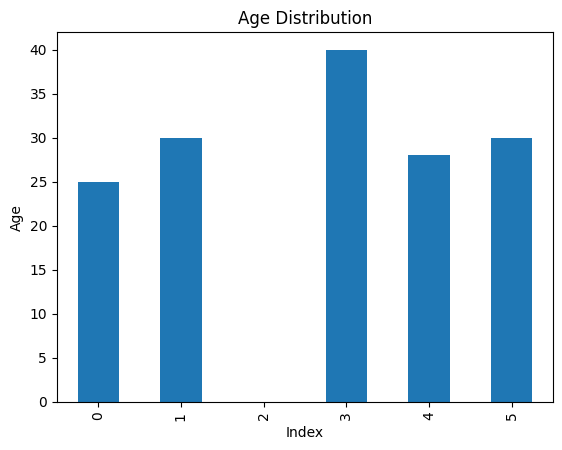

In [115]:
#plot using matplotlib
import matplotlib.pyplot as plt

print("\n Plotting Age distribution: ")
sample_df['Age'].plot(kind='bar', title='Age Distribution')
plt.xlabel('Index')
plt.ylabel('Age')

plt.show()


 Plotting salary distribution: 


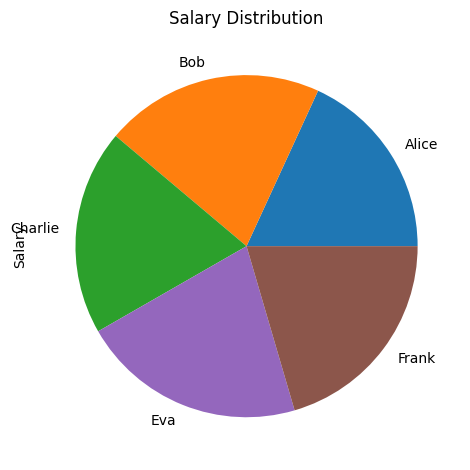

In [123]:
#10 pie chart of salary
print("\n Plotting salary distribution: ")
sample_df['Salary'].plot(kind='pie', labels=sample_df['Name'], title='Salary Distribution')
plt.tight_layout()
plt.show()

In [128]:
#Handling duplicates

#checking for duplicates
print("\n Checking for duplicates: ")
print(sample_df.duplicated(subset=['City']))


 Checking for duplicates: 
0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool


In [130]:
#drop duplicates row based on city

no_duplicates_df = sample_df.drop_duplicates(subset=['City'], keep='first')
print(no_duplicates_df)

    ID     Name   Age    City   Salary  Age_Next_Year Name_Upper  \
0  101    Alice  25.0     NYC  70000.0           26.0      ALICE   
1  102      Bob  30.0  London  80000.0           31.0        BOB   
2  103  Charlie   0.0   Paris  75000.0            0.0    CHARLIE   

  Name_Capitalize  Name_Len  
0           Alice         5  
1             Bob         3  
2         Charlie         7  


In [132]:
# performance tips

#set types as custom
print("\nConvert 'City' to category for better performance:")
sample_df['City'] = sample_df['City'].astype('category')
print(sample_df.dtypes)



Convert 'City' to category for better performance:
ID                    int64
Name                 object
Age                 float64
City               category
Salary              float64
Age_Next_Year       float64
Name_Upper           object
Name_Capitalize      object
Name_Len              int64
dtype: object


In [135]:
#Efficient selection using .loc
print("\nEfficient selection using .loc:")
print(sample_df.loc[sample_df['City'] == 'Paris'])


Efficient selection using .loc:
    ID     Name   Age   City   Salary  Age_Next_Year Name_Upper  \
2  103  Charlie   0.0  Paris  75000.0            0.0    CHARLIE   
5  106    Frank  30.0  Paris  79000.0           31.0      FRANK   

  Name_Capitalize  Name_Len  
2         Charlie         7  
5           Frank         5  


In [137]:
#Multi-Indexing

print("\nMulti-Indexing example:")
multi = pd.DataFrame({
    'City': ['NYC', 'NYC', 'London'],
    'Year': [2020, 2021, 2020],
    'Population': [8.4, 8.5, 9.0]
})
multi_index_df = multi.set_index(['City', 'Year'])
print(multi_index_df)


Multi-Indexing example:
             Population
City   Year            
NYC    2020         8.4
       2021         8.5
London 2020         9.0
